In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as ppd

In [2]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
shape_df = ppd.read_file('map_data/Regions.shp')
shape_df.head()

,REGION,geometry
0,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
1,Bicol Region (Region V),"MULTIPOLYGON (((122.98417 11.71056, 122.98333 ..."
2,CALABARZON (Region IV-A),"MULTIPOLYGON (((125.22166 10.43444, 125.22195 ..."
3,Cagayan Valley (Region II),"MULTIPOLYGON (((122.47040 16.91995, 122.47040 ..."
4,Caraga (Region XIII),"MULTIPOLYGON (((126.41750 7.96417, 126.41778 7..."


In [4]:
shape_df.crs

{'init': 'epsg:4326'}

# Layering

In [5]:
quake = ppd.read_file('earthquake01.csv')

In [6]:
quake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2019-12-19T10:11:51.495Z,6.6868,125.2688,10,4.7,mb,,87,0.489,0.76,...,"1km ENE of Matanao, Philippines",earthquake,4.9,1.9,0.115,23,reviewed,us,us,None
1,2019-12-18T16:45:59.500Z,5.774,126.3666,53.78,4.5,mb,,116,1.506,0.86,...,"68km SSE of Pondaguitan, Philippines",earthquake,7.4,7.8,0.102,28,reviewed,us,us,None
2,2019-12-18T00:22:33.168Z,6.6969,125.1958,10,5,mb,,70,0.531,1.06,...,"6km WNW of Matanao, Philippines",earthquake,6.5,1.9,0.059,93,reviewed,us,us,None
3,2019-12-17T20:18:04.853Z,6.5217,125.5161,11.45,5.4,mww,,52,0.548,0.9,...,"3km ESE of Basiawan, Philippines",earthquake,8.1,2.4,0.073,18,reviewed,us,us,None
4,2019-12-17T06:07:17.303Z,6.618,125.1816,10,4.9,mb,,74,0.597,1.06,...,"6km W of Kiblawan, Philippines",earthquake,5,1.9,0.074,75,reviewed,us,us,None


In [9]:
from shapely.geometry import Point

In [13]:
quake['longitude'] = quake.longitude.astype(float)
quake['latitude'] = quake.latitude.astype(float)

In [14]:
quake_points = [Point(xy) for xy in zip(quake['longitude'],quake['latitude'])]

In [15]:
quake_loc = ppd.GeoDataFrame(quake, crs = {'init': 'epsg:4326'}, geometry = quake_points)
quake_loc.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2019-12-19T10:11:51.495Z,6.6868,125.2688,10,4.7,mb,,87,0.489,0.76,...,"1km ENE of Matanao, Philippines",earthquake,4.9,1.9,0.115,23,reviewed,us,us,POINT (125.26880 6.68680)
1,2019-12-18T16:45:59.500Z,5.7740,126.3666,53.78,4.5,mb,,116,1.506,0.86,...,"68km SSE of Pondaguitan, Philippines",earthquake,7.4,7.8,0.102,28,reviewed,us,us,POINT (126.36660 5.77400)
2,2019-12-18T00:22:33.168Z,6.6969,125.1958,10,5,mb,,70,0.531,1.06,...,"6km WNW of Matanao, Philippines",earthquake,6.5,1.9,0.059,93,reviewed,us,us,POINT (125.19580 6.69690)
3,2019-12-17T20:18:04.853Z,6.5217,125.5161,11.45,5.4,mww,,52,0.548,0.9,...,"3km ESE of Basiawan, Philippines",earthquake,8.1,2.4,0.073,18,reviewed,us,us,POINT (125.51610 6.52170)
4,2019-12-17T06:07:17.303Z,6.6180,125.1816,10,4.9,mb,,74,0.597,1.06,...,"6km W of Kiblawan, Philippines",earthquake,5,1.9,0.074,75,reviewed,us,us,POINT (125.18160 6.61800)


In [20]:
quake_loc['mag'] = quake_loc.mag.astype(float)

In [23]:
bubbles = quake_loc['mag']*4

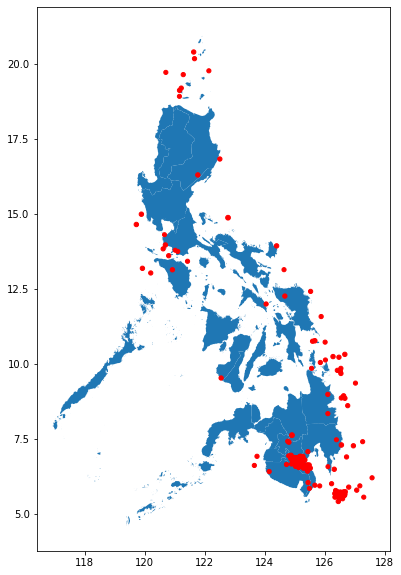

In [27]:
fig, ax = plt.subplots(1, figsize=(10,10))

shape_df.plot(ax=ax)
quake_loc.plot(ax=ax, markersize=[i for i in bubbles], color='red')

In [25]:
fig.savefig('earthquake01.png', dpi=300)

# Choropleth

In [4]:
df = pd.read_csv('health_stations.csv', header=0)
df.head()

,Region,Rate,Immunized
0,Metropolitan Manila,27.96,76.6
1,Cordillera Administrative Region (CAR),54.34,74.8
2,Ilocos Region (Region I),35.53,77.3
3,Cagayan Valley (Region II),53.66,72.1
4,Central Luzon (Region III),63.48,66.0


In [5]:
merged = shape_df.set_index('REGION').join(df.set_index('Region'))
merged.head()

,geometry,Rate,Immunized
REGION,,,
Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4...",16.91,65.5
Bicol Region (Region V),"MULTIPOLYGON (((122.98417 11.71056, 122.98333 ...",33.36,59.5
CALABARZON (Region IV-A),"MULTIPOLYGON (((125.22166 10.43444, 125.22195 ...",55.95,59.5
Cagayan Valley (Region II),"MULTIPOLYGON (((122.47040 16.91995, 122.47040 ...",53.66,72.1
Caraga (Region XIII),"MULTIPOLYGON (((126.41750 7.96417, 126.41778 7...",59.65,84.3


In [6]:
colormap1 = plt.cm.get_cmap('Greens', 15)
colormap2 = plt.cm.get_cmap('Blues', 15)

In [7]:
plot2 = merged.loc[merged.index == 'SOCCSKSARGEN (Region XII)']
plot2

,geometry,Rate,Immunized
REGION,,,
SOCCSKSARGEN (Region XII),"POLYGON ((124.53799 7.68187, 124.54649 7.68032...",93.31,61.5


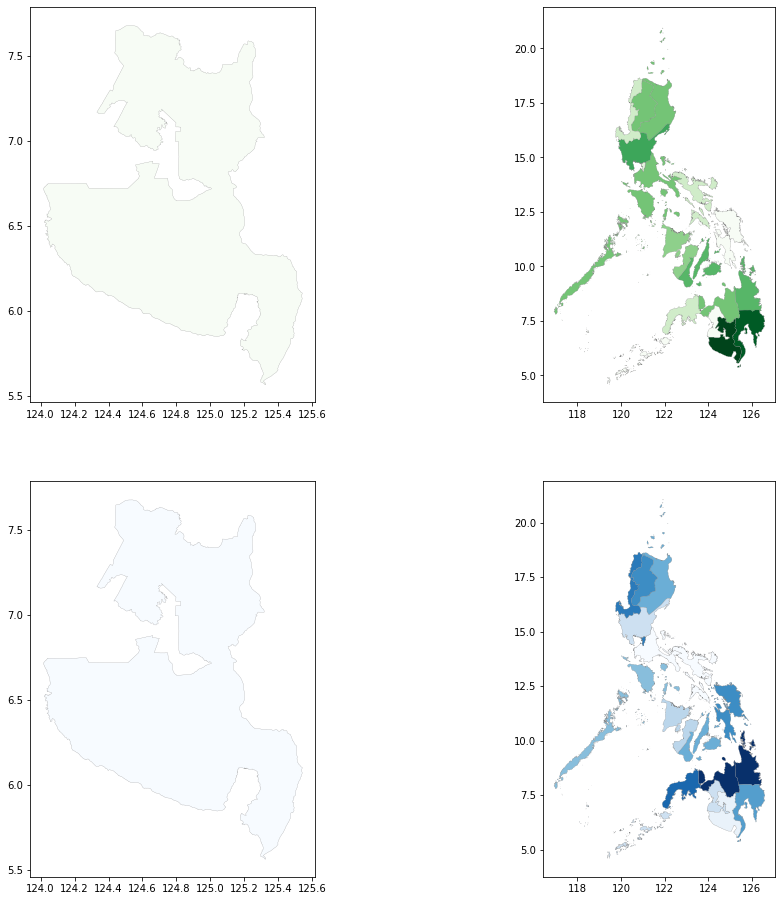

In [8]:
var1 = 'Rate'
var2 = 'Immunized'

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,16))

merged.plot(column=var1, cmap=colormap1, linewidth=0.2, ax=ax2, edgecolor='0.5')
merged.plot(column=var2, cmap=colormap2, linewidth=0.2, ax=ax4, edgecolor='0.5')

plot2.plot(column=var1, cmap=colormap1, linewidth=0.2, ax=ax1, edgecolor='0.5')
plot2.plot(column=var2, cmap=colormap2, linewidth=0.2, ax=ax3, edgecolor='0.5')

In [9]:
sm1 = plt.cm.ScalarMappable(cmap=colormap1, norm=plt.Normalize(vmin=0, vmax=100))
sm1._A = []
sm2 = plt.cm.ScalarMappable(cmap=colormap2, norm=plt.Normalize(vmin=50, vmax=100))
sm2._A = []

bar1 = inset_axes(ax2, width='5%', height='50%', loc='upper right')
bar2 = inset_axes(ax4, width='5%', height='50%', loc='upper right')

cbar = fig.colorbar(sm1, cax=bar1)
cbar = fig.colorbar(sm2, cax=bar2)

In [10]:
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

(116.44448661804198,
 127.08919715881346,
 3.7627797603606865,
 21.894300889969095)

In [11]:
fig.savefig('health_choro_map_mod.png', dpi=315)

In [ ]:
merged